<a href="https://colab.research.google.com/github/seunghyeon528/Extract_PASE_Features/blob/main/Project_utils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modules
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import models, transforms

import matplotlib.pyplot as plt
import random
import time
import os

import numpy as np

###  Google Drive Mount 

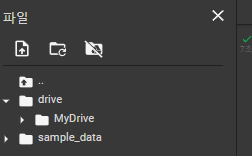

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Unzip dataset

In [ ]:
# unzip train, test dataset

# !unzip /content/gdrive/MyDrive/Project_dataset/Font_npy_90_test.zip -d /content/gdrive/MyDrive/Project_dataset/
# !unzip /content/gdrive/MyDrive/Project_dataset/Font_npy_90_train.zip -d /content/gdrive/MyDrive/Project_dataset/
# !unzip /content/gdrive/MyDrive/Project_dataset/Font_npy_90_val.zip -d /content/gdrive/MyDrive/Project_dataset/

# target 을 정하지 않으면 google drive 내의 content 드라이브에 위치시킴
!unzip /content/gdrive/MyDrive/Project_dataset/Font_npy_90_train.zip
!unzip /content/gdrive/MyDrive/Project_dataset/Font_npy_90_val.zip
!unzip /content/gdrive/MyDrive/Project_dataset/Font_npy_90_test.zip

### Custom dataset & dataloader

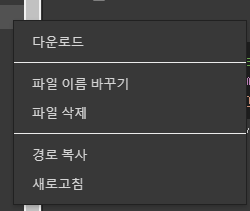

In [ ]:
# load dataset
import glob
class MyDataset(Dataset):
    def __init__(self, npy_dir): # image file (*.npy) 들을 포함하고 있는 디렉토리 경로 npy_dir 로 받아야, 
        self.dir_path = npy_dir
        self.to_tensor = transforms.ToTensor()

        # all npy path
        self.npy_path = glob.glob(os.path.join(npy_dir, '*','*.npy')) 

    def __getitem__(self, index):
        # load data
        single_data_path = self.npy_path[index]
        data = np.load(single_data_path, allow_pickle=True)
        
        image = data[0]
        image = self.to_tensor(image)
        label = data[1]
       
        return (image, label)

    def __len__(self):
        return len(self.npy_path)



# train_data = MyDataset("/content/gdrive/MyDrive/Project_dataset/Font_npy_90_train")  # unzip 한 디렉토리 있는 path 그대로 넣어야, 디렉토리 옆 점 3개 누르면 '경로 복사' 있음 - 위의 사진 참조
# valid_data = MyDataset("/content/gdrive/MyDrive/Project_dataset/Font_npy_90_val")
# test_data = MyDataset("/content/gdrive/MyDrive/Project_dataset/Font_npy_90_test")
train_data = MyDataset("/content/Font_npy_90_train")
valid_data = MyDataset("/content/Font_npy_90_val")
test_data = MyDataset("/content/Font_npy_90_test")

print(len(train_data))
print(len(valid_data))
print(len(test_data))

37232
7800
7800


In [ ]:
# define dataloader
batch_size = 50
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                           batch_size=batch_size,
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(dataset=valid_data,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                           batch_size=batch_size,
                                           shuffle=False)



# check dataloader
image,label = next(iter(valid_loader))
print(image.shape)
print(label.shape)

torch.Size([50, 1, 90, 90])
torch.Size([50])


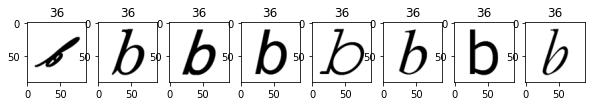

In [ ]:
# visualize data
# character - encoded_label dict , 데이터 확인해보고 싶을 때 참조
label_dict = {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 
'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17,
'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'P': 24, 'Q': 25, 
'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 
'Z': 34, 'a': 35, 'b': 36, 'd': 37, 'e': 38, 'f': 39, 'g': 40, 'h': 41, 
'i': 42, 'j': 43, 'm': 44, 'n': 45, 'o': 46, 'q': 47, 'r': 48, 't': 49, 'u': 50, 'y': 51}

# image_show function : num 수 만큼 dataset 내의 data를 보여주는 함수
def image_show(dataset, num):
  fig = plt.figure(figsize=(10,10))

  for i in range(num):
    plt.subplot(1, num, i+1)
    plt.imshow(dataset[i+1200][0].squeeze(), cmap = "gray")
    plt.title(dataset[i+1200][1])

image_show(train_data, 8)

### Check GPU Configuration

In [ ]:
# device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### Fix seed

In [ ]:
# FIX SEED
SEED = 1234
random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)